In [1]:
import random
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
from PIL import Image
import os
import sys
from tqdm import tqdm
from collections import Counter, defaultdict
import csv
from pathlib import Path
from matplotlib import pyplot as plt
import json

In [2]:
# Defining project paths
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.append(project_root) 

training_data_path = os.path.join(project_root, "PlantCLEF2025_data/images_max_side_800")
inference_data_path = os.path.join(project_root, "PlantCLEF2025_data/test_images/images")

In [3]:
# Get the trained ResNet50 multi-label classifier and initialize configuration
from resnet50 import resnet50_multilabel   # get pretrained ResNet50 and helper functions

NUM_CLASS = 7806

resnet50_multilabel_model = resnet50_multilabel.get_resnet50_pretrained(num_classes=NUM_CLASS, fine_tune=False)
state_dict = torch.load(f'{project_root}/resnet50_multilabel_finetune_plantCLEF.pth', map_location=torch.device('cpu'), weights_only=True)  # weights_only=True is recommended for security
resnet50_multilabel_model.load_state_dict(state_dict)

<All keys matched successfully>

In [4]:
# Load the saved (idx-cls, cls-idx) mapping dictionaries back:
# with open('resnet50/cls_to_idx_mapdict.json', 'r') as f:
#     cls_to_idx_mapdict = json.load(f)

with open(f'{project_root}/resnet50/idx_to_cls_mapdict.json', 'r') as g:
    idx_to_cls_mapdict = json.load(g)
    
print(f"Mapping dictionaries loaded!\n")

Mapping dictionaries loaded!



In [5]:
# Load the GradCam model for ResNet50
from resnet50 import resnet50_gradcam

# Run the main function to generate GradCam Heatmaps
img_path = "./CBN-Pla-E1-20150723.jpg"


Using device: cpu
Loading ResNet50 model...


/home/hl9h/.local/lib/python3.12/site-packages/torch/nn/modules/module.py:1866: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


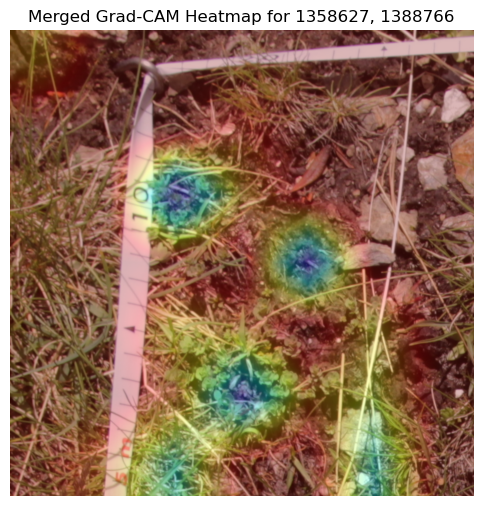

No target classes found.
No classes found with threshold >= 0.06.


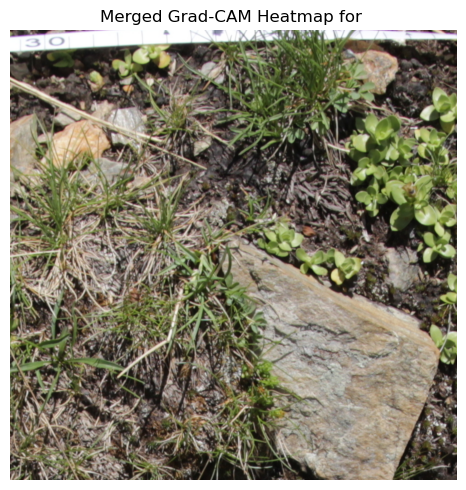

No target classes found.
No classes found with threshold >= 0.06.


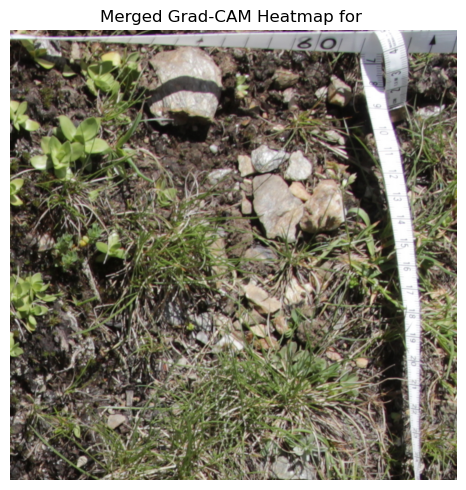

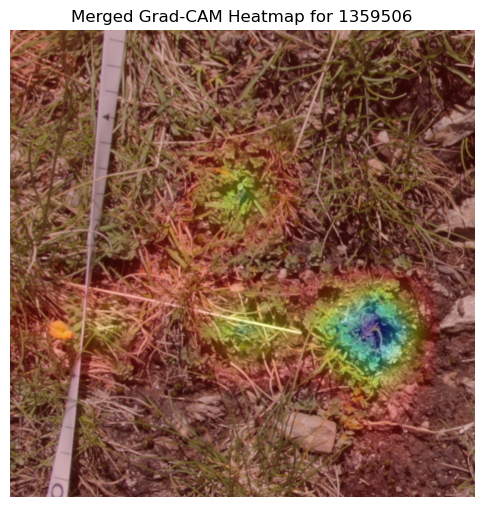

No target classes found.
No classes found with threshold >= 0.06.


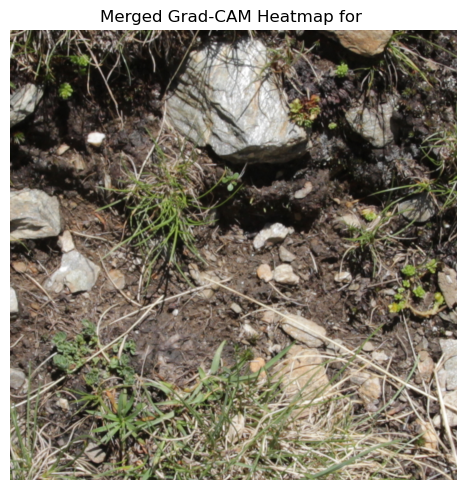

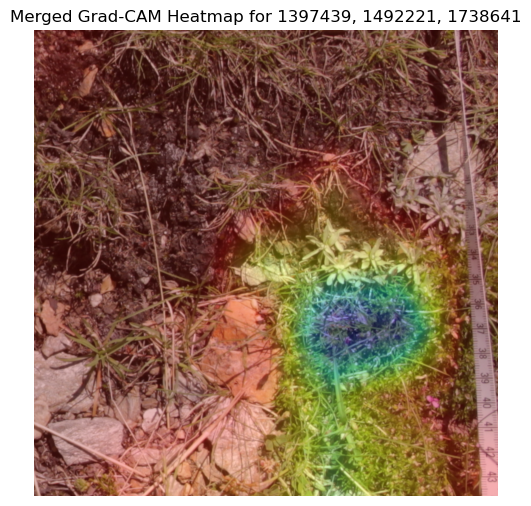

No target classes found.
No classes found with threshold >= 0.06.


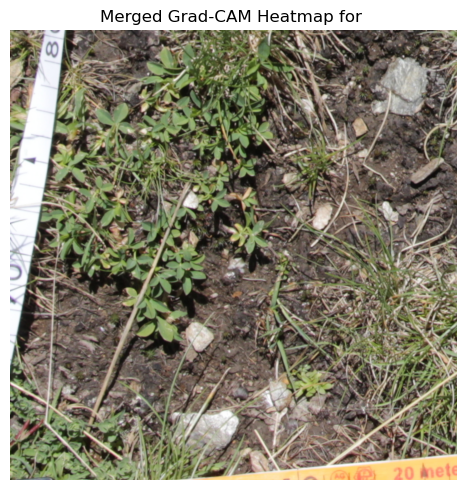

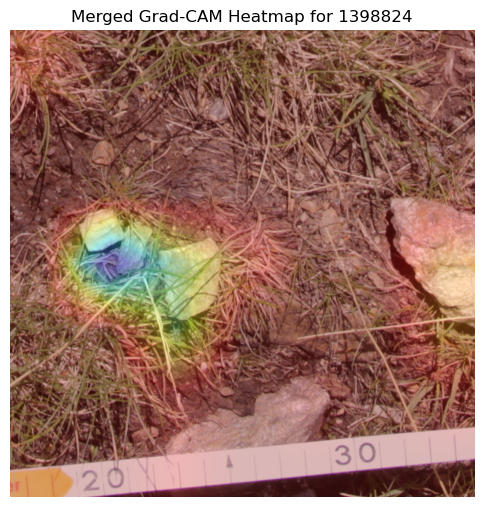

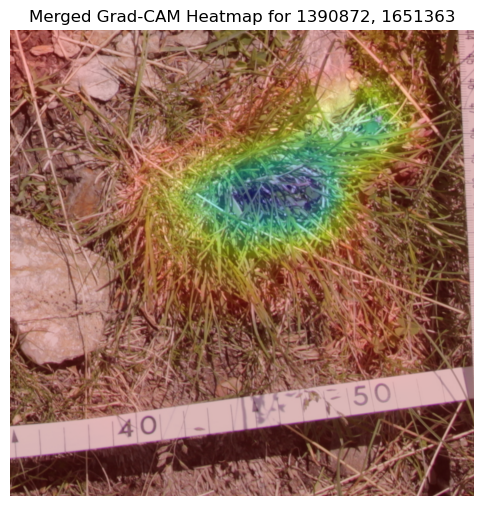

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = resnet50_gradcam.load_model(resnet50_multilabel_model, device)

tiles = resnet50_gradcam.get_tiles(img_path, tiles_per_side=3)

for tile in tiles:
    resnet50_gradcam.visualize_gradcam(tile, model, idx_to_cls_mapdict, device, threshold=0.06, target_layer_name='layer4')